In [1]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17385018600926905974,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2646287699157723150
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6659833280
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13266546191251713069
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13302214957507672768
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [3]:
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [3]:
import keras
from keras.models import Sequential, Model
from keras import layers, applications, optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [4]:
epoch = 100
batch_size = 5
image_size = 224

In [6]:
#load train data(25000 imgs each)

filenames = os.listdir('./input/train/train')
data = []
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
    
    image = load_img(os.path.join('./input/train/train', filename), color_mode='rgb', target_size=(image_size,image_size))
    image = np.array(image)
    data.append(image)

data = np.array(data)
categories = np.array(categories)

print(data)
print(categories)

[[[[203 164  87]
   [206 167  90]
   [209 170  93]
   ...
   [245 203 119]
   [241 202 123]
   [239 200 121]]

  [[203 164  87]
   [206 167  90]
   [209 170  93]
   ...
   [245 205 120]
   [242 203 124]
   [240 201 122]]

  [[203 164  87]
   [206 167  90]
   [209 170  93]
   ...
   [245 204 122]
   [243 204 125]
   [241 202 123]]

  ...

  [[154 123  56]
   [155 124  57]
   [156 125  58]
   ...
   [  3   3   1]
   [  3   3   1]
   [  3   3   1]]

  [[153 122  55]
   [153 122  55]
   [154 123  56]
   ...
   [  2   2   0]
   [  2   2   0]
   [  2   2   0]]

  [[151 120  53]
   [152 121  54]
   [153 122  55]
   ...
   [  1   1   0]
   [  1   1   0]
   [  1   1   0]]]


 [[[ 39  44  40]
   [ 40  44  43]
   [ 41  45  46]
   ...
   [210 209 181]
   [207 204 171]
   [201 199 161]]

  [[ 40  45  41]
   [ 40  44  43]
   [ 41  45  46]
   ...
   [207 203 176]
   [203 200 169]
   [197 195 157]]

  [[ 39  44  40]
   [ 38  42  41]
   [ 37  41  42]
   ...
   [195 191 166]
   [198 193 164]
   [205 200

In [7]:
# shuffle dataset

idx = np.random.permutation(len(data))
data, categories = data[idx], categories[idx]

In [8]:
# split train 6(15,000) / val 2(5,000) / test 2(5,000)

x_train = data[:15000]
y_train = categories[:15000]
x_temp, y_temp = data[-10000:], categories[-10000:]

from sklearn.model_selection import train_test_split

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [9]:
print(x_train, y_train)

print(x_temp, y_temp)
print(x_temp.shape, y_temp.shape)

print(x_val, y_val)

print(x_test, y_test)
print(x_test.shape, y_test.shape)

[[[[ 67  71  44]
   [ 69  73  46]
   [ 74  80  46]
   ...
   [ 40  56  30]
   [ 49  67  41]
   [ 49  67  41]]

  [[ 68  72  45]
   [ 69  73  46]
   [ 74  80  46]
   ...
   [ 41  57  31]
   [ 50  68  42]
   [ 51  69  43]]

  [[ 68  72  47]
   [ 70  74  47]
   [ 73  80  47]
   ...
   [ 44  60  34]
   [ 53  72  44]
   [ 54  73  45]]

  ...

  [[154 147 121]
   [176 168 145]
   [174 166 145]
   ...
   [144 113  95]
   [139 111  87]
   [140 112  88]]

  [[166 159 133]
   [177 169 146]
   [164 156 135]
   ...
   [133 102  84]
   [135 107  83]
   [136 108  84]]

  [[177 170 144]
   [175 167 144]
   [165 157 136]
   ...
   [126  95  77]
   [143 115  91]
   [144 116  92]]]


 [[[133 140 150]
   [155 159 170]
   [141 143 155]
   ...
   [ 66  56  54]
   [ 53  66  49]
   [ 63  76  59]]

  [[153 151 139]
   [139 135 124]
   [114 107  97]
   ...
   [ 61  61  53]
   [ 51  68  49]
   [ 65  82  63]]

  [[176 166 139]
   [161 151 124]
   [129 117  91]
   ...
   [ 57  60  49]
   [ 51  70  50]
   [ 65  84

In [10]:
# data augmentation in train set (train 15,000 to 75,000)

x_train_temp = x_train
y_train_temp = y_train

x_train_aug = []
y_train_aug = []

for img, label in zip(x_train_temp, y_train_temp):
    curImg = img
    
    flipped1 = tf.image.flip_left_right(curImg)
    flipped2 = tf.image.flip_up_down(curImg)
    
    x_train_aug.append(flipped1)
    x_train_aug.append(flipped2)
    
    for i in range(3):
        cropped = curImg[random.randrange(0,100):random.randrange(180,225), random.randrange(0,100):random.randrange(180,225)]
        cropped = cv2.resize(cropped, (image_size, image_size))
        x_train_aug.append(cropped)
    
    for i in range(0, 5):
        y_train_aug.append(label)
        
x_train_aug = np.array(x_train_aug)
y_train_aug = np.array(y_train_aug)

In [11]:
x_train = np.concatenate((x_train, x_train_aug))
y_train = np.concatenate((y_train, y_train_aug))

In [12]:
print(x_train.shape)
print(y_train.shape)

(90000, 224, 224, 3)
(90000,)


In [13]:
def build_vgg_block(input_layer, num_cnn=3, channel=64, block_num=1):
    x = input_layer
    
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}')(x)

    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,
        name=f'block{block_num}_pooling')(x)

    return x

In [14]:
def build_vgg(input_shape=(image_size,image_size,3),
              num_cnn_list=[2,2,3,3,3],
              channel_list=[64,128,256,512,512],
              num_classes=2):
    input_layer = keras.layers.Input(shape=input_shape)
    output = input_layer
    
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_vgg_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
    )
        
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2', name='fc1')(output)
    output = keras.layers.Dropout(0.5)(output)
    output = keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2', name='fc2')(output)
    output = keras.layers.Dropout(0.5)(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

In [15]:
%load_ext tensorboard

import datetime

In [15]:
model = build_vgg()

In [16]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, clipnorm=1.),
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 112, 112, 64)      0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 56, 56, 128)      

In [19]:
log_dir = "logs/vgg_da_new/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint('vgg16.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

In [21]:
epoch = 11

history = model.fit(
    x_train, y_train,
    epochs=epoch,
    validation_data=(x_val, y_val),
    #validation_steps=2500//batch_size,
    #steps_per_epoch=22500//batch_size,
    verbose=1,
    #callbacks=[tensorboard_callback, early_stopping, model_checkpoint]
    # callbacks=[tensorboard_callback, reduce_lr]
    callbacks=[reduce_lr]
)

Epoch 1/11
2813/2813 [==============================] - 679s 242ms/step - loss: 16.9499 - accuracy: 0.5636 - val_loss: 0.6146 - val_accuracy: 0.6740
Epoch 2/11
2813/2813 [==============================] - 683s 243ms/step - loss: 0.5650 - accuracy: 0.7290 - val_loss: 0.4353 - val_accuracy: 0.8234
Epoch 3/11
2813/2813 [==============================] - 683s 243ms/step - loss: 0.4651 - accuracy: 0.8012 - val_loss: 0.3475 - val_accuracy: 0.8720
Epoch 4/11
2813/2813 [==============================] - 681s 242ms/step - loss: 0.3668 - accuracy: 0.8574 - val_loss: 0.2289 - val_accuracy: 0.9190
Epoch 5/11
2813/2813 [==============================] - 680s 242ms/step - loss: 0.3003 - accuracy: 0.8904 - val_loss: 0.2071 - val_accuracy: 0.9316
Epoch 6/11
2813/2813 [==============================] - 679s 241ms/step - loss: 0.2623 - accuracy: 0.9087 - val_loss: 0.2223 - val_accuracy: 0.9218
Epoch 7/11
2813/2813 [==============================] - 679s 241ms/step - loss: 0.2373 - accuracy: 0.9213 - val

In [23]:
%tensorboard --logdir logs/vgg_da_new

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 30812.

train loss: 0.16560471057891846
train accuracy: 0.9526888728141785
dev loss: 0.15588223934173584
dev accuracy: 0.9490000009536743


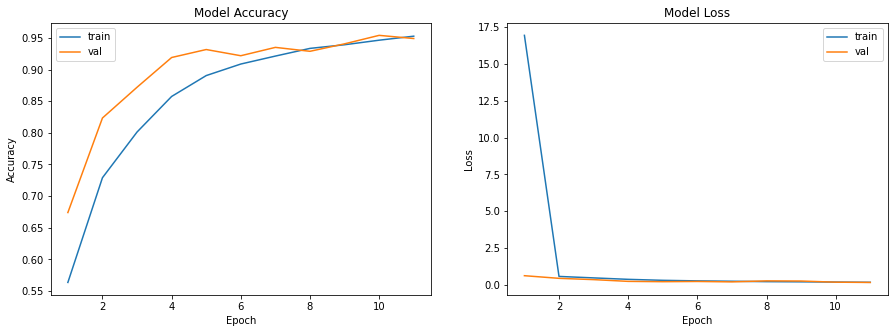

In [22]:
print('train loss:', history.history['loss'][-1])
print('train accuracy:', history.history['accuracy'][-1])

print('dev loss:', history.history['val_loss'][-1])
print('dev accuracy:', history.history['val_accuracy'][-1])

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(range(1,len(history.history['accuracy'])+1), history.history['accuracy'])
axs[0].plot(range(1,len(history.history['val_accuracy'])+1),history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'val'], loc='best')

axs[1].plot(range(1,len(history.history['loss'])+1),history.history['loss'])
axs[1].plot(range(1,len(history.history['val_loss'])+1),history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'val'], loc='best')

plt.show()

In [24]:
model.save_weights('vgg_weight.h5')

In [23]:
model.save('vgg.h5')

In [25]:
predictions = model.predict(x_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:

Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_161926 in device /job:

In [26]:
print(predictions)

y_pred = []

for i in predictions:
    if i[0] < i[1]:
        y_pred.append(1)
    else:
        y_pred.append(0)

[[9.4296041e-08 9.9999988e-01]
 [1.0000000e+00 4.7188795e-29]
 [6.9426111e-04 9.9930573e-01]
 ...
 [7.8344010e-07 9.9999917e-01]
 [9.9998593e-01 1.4030659e-05]
 [3.6886752e-15 1.0000000e+00]]


In [27]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

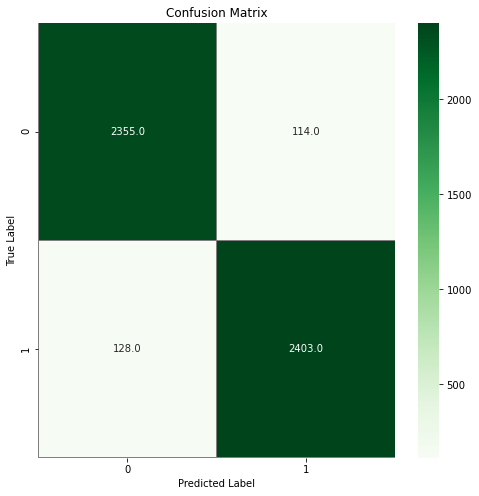

In [28]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens",linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [29]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['cat', 'dog'])

In [30]:
print(report)

              precision    recall  f1-score   support

         cat       0.95      0.95      0.95      2469
         dog       0.95      0.95      0.95      2531

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000

